In [3]:
import requests
import pandas as pd
import numpy as np
import json
from pprint import pprint

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import IFrame

In [3]:
sns.set_color_codes()
sns.set_style("white")

In [4]:
with open('/nbaData/0021500491.json') as data_file:
    data=json.load(data_file)
    


In [5]:
home=data["events"][0]["home"]
away=data["events"][0]["visitor"]
moments=data["events"][0]["moments"]

In [6]:
#gamedate and gameID
#game IDs for 2014-2015 follow format: 002140XXXX.
#game IDs for 2015-2016 follow format: 002150XXXX.

print data["gamedate"]
print data["gameid"]



2016-01-01
0021500491


In [7]:
# Column labels
headers = ["team_id", "player_id", "x_loc", "y_loc", 
           "z_loc","game_clock", "shot_clock"]
print moments[0]

[1, 1451695284002, 706.62, 8.92, None, [[-1, -1, 75.32556, 5.98097, 5.49124], [1610612748, 2547, 63.7092, 34.45719, 0.0], [1610612748, 2736, 81.69544, 11.30207, 0.0], [1610612748, 201609, 70.29572, 7.46278, 0.0], [1610612748, 202355, 83.90212, 34.19776, 0.0], [1610612748, 204020, 87.10757, 47.84178, 0.0], [1610612742, 1717, 73.23341, 27.90537, 0.0], [1610612742, 200826, 84.12922, 31.64608, 0.0], [1610612742, 2585, 84.09753, 28.95075, 0.0], [1610612742, 202083, 82.54378, 13.31071, 0.0], [1610612742, 202718, 74.64288, 11.58677, 0.0]]]


In [8]:

# Initialize our new list
player_moments = []
for moment in moments:
    for player in moment[5]:
        tempPlayer = player[0:5]
        tempPlayer.append(moment[2])
        tempPlayer.append(moment[3])
        player_moments.append(tempPlayer)

In [9]:
#print player_moments
df = pd.DataFrame(player_moments, columns=headers)

#df.head(8)

In [10]:
players=home["players"]

players.extend(away["players"])

In [11]:
id_dict={}

In [12]:
for i in range(0,len(players)):
    id_dict[players[i]["playerid"]]=[players[i]["firstname"]+" "+players[i]["lastname"],players[i]["jersey"]]

In [13]:
id_dict.update({-1: ['ball',np.nan]})

In [14]:
df["player_name"] = df.player_id.map(lambda x: id_dict[x][0])
df["player_jersey"] = df.player_id.map(lambda x: id_dict[x][1])

In [15]:
df.head(11)

,team_id,player_id,x_loc,y_loc,z_loc,game_clock,shot_clock,player_name,player_jersey
0,-1,-1,75.32556,5.98097,5.49124,706.62,8.92,ball,NaN
1,1610612748,2547,63.70920,34.45719,0.00000,706.62,8.92,Chris Bosh,1
2,1610612748,2736,81.69544,11.30207,0.00000,706.62,8.92,Luol Deng,9
3,1610612748,201609,70.29572,7.46278,0.00000,706.62,8.92,Goran Dragic,7
4,1610612748,202355,83.90212,34.19776,0.00000,706.62,8.92,Hassan Whiteside,21
5,1610612748,204020,87.10757,47.84178,0.00000,706.62,8.92,Tyler Johnson,8
6,1610612742,1717,73.23341,27.90537,0.00000,706.62,8.92,Dirk Nowitzki,41
7,1610612742,200826,84.12922,31.64608,0.00000,706.62,8.92,Jose Juan Barea,5
8,1610612742,2585,84.09753,28.95075,0.00000,706.62,8.92,Zaza Pachulia,27
9,1610612742,202083,82.54378,13.31071,0.00000,706.62,8.92,Wesley Matthews,23


In [16]:
barea = df[df.player_name=="Jose Juan Barea"]
court = plt.imread("/home/keith/nba/fullcourt.png")

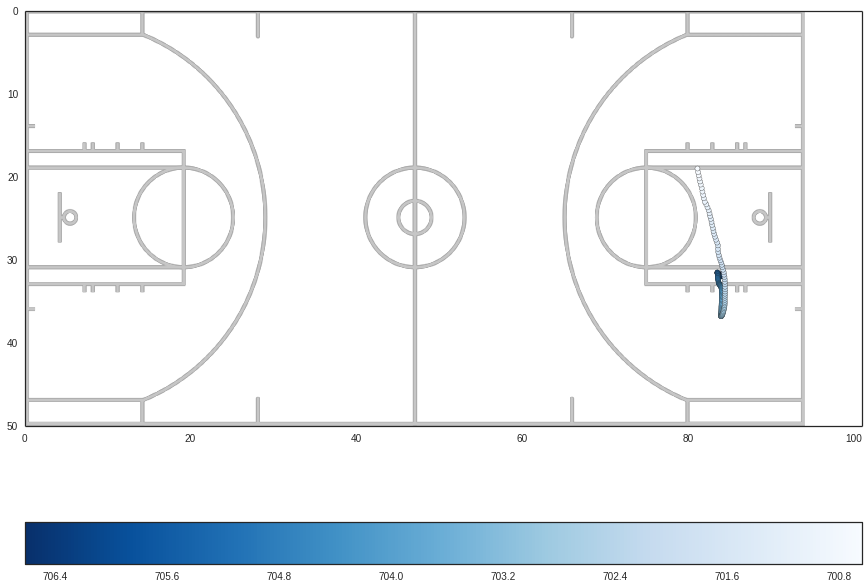

In [19]:
plt.figure(figsize=(15, 11.5))

# Plot the movemnts as scatter plot
# using a colormap to show change in game clock
plt.scatter(barea.x_loc, barea.y_loc, c=barea.game_clock,
            cmap=plt.cm.Blues, s=25, zorder=1)
# Darker colors represent moments earlier on in the game
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.invert_xaxis()
# This plots the court
# zorder=0 sets the court lines underneath Harden's movements
# extent sets the x and y axis values to plot the image within.
# The original animation plots in the SVG coordinate space
# which has x=0, and y=0 at the top left.
# So, we set the axis values the same way in this plot.
# In the list we pass to extent 0,94 representing the x-axis 
# values and 50,0 representing the y-axis values
plt.imshow(court, zorder=0, extent=[0,94,50,0])

# extend the x-values beyond the court b/c Harden
# goes out of bounds
plt.xlim(0,101)


plt.show()

In [19]:
from matplotlib.patches import Circle, Rectangle, Arc

# Function to draw the basketball court lines
def draw_court(ax=None, color="gray", lw=1, zorder=0):
    
    if ax is None:
        ax = plt.gca()

    # Creates the out of bounds lines around the court
    outer = Rectangle((0,-50), width=94, height=50, color=color,
                      zorder=zorder, fill=False, lw=lw)

    # The left and right basketball hoops
    l_hoop = Circle((5.35,-25), radius=.75, lw=lw, fill=False, 
                    color=color, zorder=zorder)
    r_hoop = Circle((88.65,-25), radius=.75, lw=lw, fill=False,
                    color=color, zorder=zorder)
    
    # Left and right backboards
    l_backboard = Rectangle((4,-28), 0, 6, lw=lw, color=color,
                            zorder=zorder)
    r_backboard = Rectangle((90, -28), 0, 6, lw=lw,color=color,
                            zorder=zorder)

    # Left and right paint areas
    l_outer_box = Rectangle((0, -33), 19, 16, lw=lw, fill=False,
                            color=color, zorder=zorder)    
    l_inner_box = Rectangle((0, -31), 19, 12, lw=lw, fill=False,
                            color=color, zorder=zorder)
    r_outer_box = Rectangle((75, -33), 19, 16, lw=lw, fill=False,
                            color=color, zorder=zorder)

    r_inner_box = Rectangle((75, -31), 19, 12, lw=lw, fill=False,
                            color=color, zorder=zorder)

    # Left and right free throw circles
    l_free_throw = Circle((19,-25), radius=6, lw=lw, fill=False,
                          color=color, zorder=zorder)
    r_free_throw = Circle((75, -25), radius=6, lw=lw, fill=False,
                          color=color, zorder=zorder)

    # Left and right corner 3-PT lines
    # a represents the top lines
    # b represents the bottom lines
    l_corner_a = Rectangle((0,-3), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    l_corner_b = Rectangle((0,-47), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    r_corner_a = Rectangle((80, -3), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    r_corner_b = Rectangle((80, -47), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    
    # Left and right 3-PT line arcs
    l_arc = Arc((5,-25), 47.5, 47.5, theta1=292, theta2=68, lw=lw,
                color=color, zorder=zorder)
    r_arc = Arc((89, -25), 47.5, 47.5, theta1=112, theta2=248, lw=lw,
                color=color, zorder=zorder)

    # half_court
    # ax.axvline(470)
    half_court = Rectangle((47,-50), 0, 50, lw=lw, color=color,
                           zorder=zorder)

    hc_big_circle = Circle((47, -25), radius=6, lw=lw, fill=False,
                           color=color, zorder=zorder)
    hc_sm_circle = Circle((47, -25), radius=2, lw=lw, fill=False,
                          color=color, zorder=zorder)

    court_elements = [l_hoop, l_backboard, l_outer_box, outer,
                      l_inner_box, l_free_throw, l_corner_a,
                      l_corner_b, l_arc, r_hoop, r_backboard, 
                      r_outer_box, r_inner_box, r_free_throw,
                      r_corner_a, r_corner_b, r_arc, half_court,
                      hc_big_circle, hc_sm_circle]

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

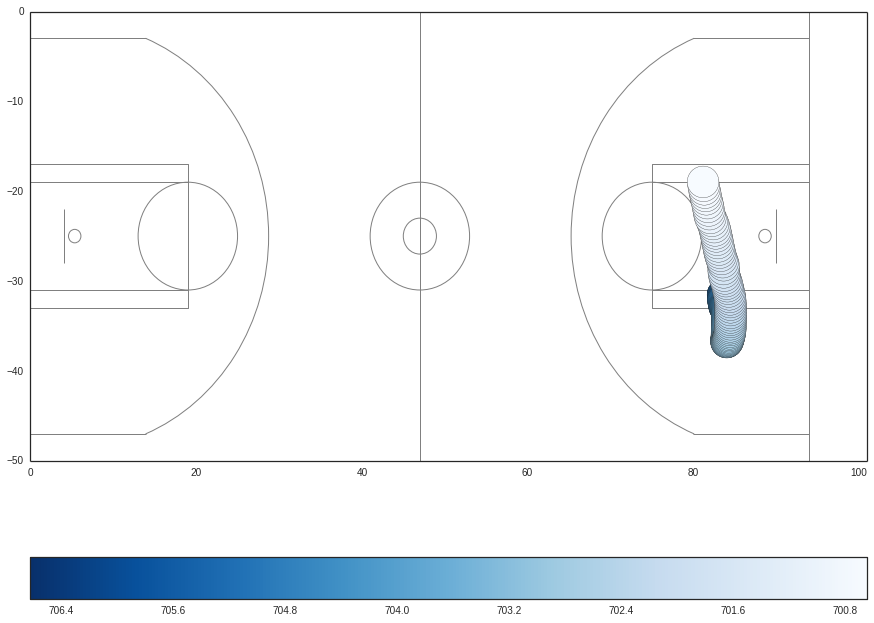

In [22]:

plt.figure(figsize=(15, 11.5))

# Plot the movemnts as scatter plot
# using a colormap to show change in game clock
plt.scatter(barea.x_loc, -barea.y_loc, c=barea.game_clock,
            cmap=plt.cm.Blues, s=1000, zorder=1)

# Darker colors represent moments earlier on in the game
cbar = plt.colorbar(orientation="horizontal")
# invert the colorbar to have higher numbers on the left
cbar.ax.invert_xaxis()

draw_court()

plt.xlim(0, 101)
plt.ylim(-50, 0)
plt.show()

In [25]:
def travel_dist(player_locations):
    # get the differences for each column
    diff = np.diff(player_locations, axis=0)
    # square the differences and add them,
    # then get the square root of that sum
    dist = np.sqrt((diff ** 2).sum(axis=1))
    # Then return the sum of all the distances
    return dist.sum()

In [29]:
player_travel_dist = df.groupby('player_name')[['x_loc', 'y_loc']].apply(travel_dist)
player_trav
    # Creates the out of bounds lel_dist

player_name
Chandler Parsons    35.496548
Chris Bosh          23.141308
Dirk Nowitzki       20.195014
Goran Dragic        33.983710
Hassan Whiteside    28.672119
Jose Juan Barea     25.204212
Luol Deng           37.878466
Tyler Johnson       27.687511
Wesley Matthews     33.548856
Zaza Pachulia       22.630781
ball                69.778066
dtype: float64

In [8]:
from matplotlib.patches import Circle, Rectangle, Arc

# Function to draw the basketball court lines
def draw_court(ax=None, color="gray", lw=1, zorder=0):
    
    if ax is None:
        ax = plt.gca()

    # Creates the out of bounds lines around the court
    outer = Rectangle((0,-50), width=94, height=50, color=color,zorder=zorder, fill=False, lw=lw)
    
    
    court_elements = [outer]
#[l_hoop, l_backboard, l_outer_box, outer,
#                       l_inner_box, l_free_throw, l_corner_a,
#                       l_corner_b, l_arc, r_hoop, r_backboard, 
#                       r_outer_box, r_inner_box, r_free_throw,
#                       r_corner_a, r_corner_b, r_arc, half_court,
#                       hc_big_circle, hc_sm_circle]

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        
    return ax

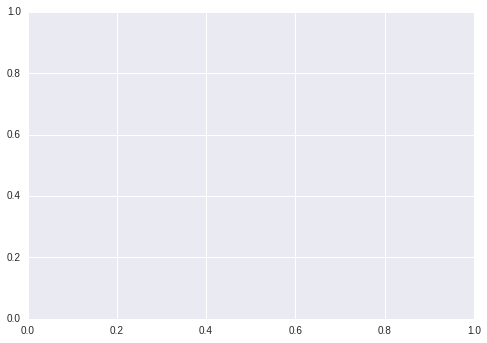

In [9]:
draw_court()